# TP 4  
Ce TP regroupe le chapitre 5 (partie 2)  du cours calcul scientifique. <br>

**Deadline 14 Mai 23h59**

Ce TP est noté sur 15 points répartis comme suit: 
    - Exercice: 13 points
    - Qualité du code, commentaires et interprétations: 2 points
    
    
Suivez attentivement les consignes de chaque exercice. <br>
Il s'agit d'un TP guidé. La majorité du code est dèjà fournie. et vous allez compléter quelques lignes. Lisez attentivement les explications, questions et commentaires du code pour comprendre ce qui est demandé à chaque fois

In [1]:
# You have here all the imports you are going 
# to need for this exercice. Please don't import 
# anything else
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Exercice
Dans cet exercice nous allons travailler averc Boston Housing Data. Une dataset très connue surtout lorqu'il s'agit de régression linéaire sur Python vu qu'elle est fournie avec le package sklearn. Elle contient des données concernant des maisons dans différents quartiers de Boston. La variable qu'on cherche à prédire est la médiane des prix des maisons habitées dans un quartier. Vous aurez plus de détails dans la prochaine étape.<br><br>

L'objectif est de créer 3 modèles de régression linéaire : un modèle avec LinearRegression de sklearn (modèle OLS), un modèle avec SGDRegressor (utilisant Gradient Descent) et un modèle basé aussi sur gradient descent mais que nous allons implémenter manuellement ensemble. <br><br>

Dans ce TP nous allons aussi utiliser la notion de pipelines qui ont pour objectif de lier les différentes phases de la création du modèle afin de l'exécuter d'une manière séquentielle et automatiques

## Etape 1: Importer les données et préparer la dataset. 
Pour cette étape, il n'y a pas de travail demandé. Tout est déjà implémenté. Par contre, je vous prie de lire cette partie parce qu'elle va servir à réaliser le travail plus tard.

In [2]:
# Loading the data: 
boston = load_boston()
# Printing data keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

L'import de Boston donne un dictionnaire de 5 éléments qui sont: 
1. __data:__ les données que nous allons travailler avec sans la variable à prédire (autrement dit X)
2. __target:__ la variable à prédire (autrement dit Y)
3. __feature_names:__ les noms des différentes variables
4. __'DESCR':__ la description de chaque variable
5. __filename__: l'emplacement de la dataset boston en csv

Maintenant nous allons créer X et y

In [3]:
X= boston.data
y= boston.target
# printing the shapes of X and y
print('the shape of X is ', X.shape)
print('the shape of y is ', y.shape)

the shape of X is  (506, 13)
the shape of y is  (506,)


__Maintenant, explorons les variables qui constituent notre dataset.__

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

La dataset a une seule variable catégorique qui est déjà codée en dummy variable. Donc, on n'a pas à se soucier par rapport à ça. <br><br>
Aussi si les variables vous semblent un peu difficiles à comprendre ne vous inquiétez pas. Notre objectif dans ce TP n'est pas d'analyser les variables mais plutôt de les utiliser pour la modélisation<br><br>
Par contre, je vais mettre les données dans une dataframe pour les mieux visualiser et explorer quelques caractéristiques en utilisant Pandas. Notez bien, que cette manipulation est juste pour l'exploration des données et on ne va pas utiliser le données sous formes de dataframe dans le  reste de l'exercice (Rappelez-vous, on a déjà créé X et y)<br><br>

In [5]:
# Creating a pandas DF
bostonDF = pd.DataFrame( boston.data )
# adding the feature_names as column headers
bostonDF.columns = boston.feature_names
#adding the target variable to the dataframe
bostonDF['PRICE' ]= boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# checking for missing values
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


__On n'a pas de données manquantes (yay)__

In [7]:
# getting the dataset description
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


__On remarque que les variables sont de différentes échelles. Nous allons les standardiser plus tard pour assurer une meilleure modélisation__

## Etape 2: Division des données en training et testing
<font color='red'>Question 1: (1 point) </font> <br>
Divisez les données en training et testing en utilisant la méthode 'train_test_split', en gardant 80% des données pour le training et 20% pour le test. Il faudra aussi activer le shuffle pour assurer une variété des données et choisir un random_state égal à 42 pour la reproduction des mêmes résultats pour toute exécution

In [8]:
np.random.seed(42)

#########################################
# write the code to split the data here #
#########################################
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80, test_size=0.20,shuffle=True , random_state=42) # question 1
#########################################
#########################################

## Etape 3: Préparation de la dataframe regroupant les résultats

In [9]:
# preparing the template of the dataframe to which we will append the results of each model
results = pd.DataFrame({'Results':['theta0','theta1','theta2','theta3','theta4','theta5','theta6','theta7','theta8','theta9'
                                            ,'theta10','theta11', 'theta12','theta13', 'train_RMSE', 'test_RMSE','r_squared']})

results.head(17)

,Results
0,theta0
1,theta1
2,theta2
3,theta3
4,theta4
5,theta5
6,theta6
7,theta7
8,theta8
9,theta9


## Etape 4: Création du premier modèle (LinearRegression)

Les 3 premières lignes de la cellule ci-dessous montrent l'utilisation de pipeline. L'idée est de regrouper différents traitements qui se succèdent de manière à s'exécuter l'un après l'autres automatiquement sans avoir à intervenir et exécuter à chaque fois. <br>
Par exemple ici, nous avons regroupé la préparation des données (la standardization) avec la modélisation. De cette manière, on n'a pas à exécuter la méthode fit pour la standardization puis une autre fois pour la modélisation. Il suffit de faire un seul fit qui va standardiser les données puis les fournir au modèle comme dans la lign 4 de la cellule. <br>
Pour accéder aux méthodes et paramètres de chaque partie de la pipeline il suffit d'accéder à l'élément souhaité. 
<br>
<font color='green'>Par exemple: sklearn_Linear_Regression_model['ols'].intercept_ </font> <br><br> <br>

<font color='red'>Question 2: (1 point)  </font> <br>
Complétez les méthodes predict afin de prédire les valeurs des données de training dans la première ligne et les valeurs des données de test dans la deuxième ligne <br> <br>

<font color='red'>Question 3: (1 point)  </font> <br>
Concaténez la dataframe 'first_model' à la dataframe 'results'


In [10]:
# preparation and initialization of the pipeline
sklearn_Linear_Regression_model  = Pipeline([
        ("std_scaler", StandardScaler()),  # First step preprocessing
        ("ols", LinearRegression())        # Second step modeling
        ])

#fitting the data and creating the model
sklearn_Linear_Regression_model.fit(X_train, y_train)

# predicting price values using the model defined above for training data and testing data

#########################################
#             Question 2                #
#########################################
y_pred_train = sklearn_Linear_Regression_model.predict(X_train)
y_pred_test = sklearn_Linear_Regression_model.predict(X_test)
#########################################
#########################################

# Calculating result metrics of the model for evaluation
rmse_ols_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE for training data
rmse_ols_test= np.sqrt(mean_squared_error(y_test, y_pred_test))     # RMSE for testing data
r2_ols= r2_score(y_pred_test, y_test)                               # R squared




In [11]:
# Creating an numpy array that will contain all the model
# results: Intercept, coefficients, RMSE for train and test
# and Rsquared. This numpy array will then be converted into 
# a dataframe and appended to the results table prepared above. 

# appending intercept and coefficients
first_model_results= np.append (sklearn_Linear_Regression_model['ols'].intercept_,sklearn_Linear_Regression_model['ols'].coef_)

# appending training RMSE
first_model_results= np.append (first_model_results,rmse_ols_train)

# appending testing RMSE
first_model_results= np.append(first_model_results,rmse_ols_test)

# appending R squared
first_model_results= np.append(first_model_results,r2_ols)


# converting the numpy array to dataframe
first_model = pd.DataFrame({'sklearn LinearRegression':first_model_results})

#########################################
# write the code to concatenate the DFs #
#########################################
results = results.join(first_model) # question 3
#########################################
#########################################
results.head(17)

,Results,sklearn LinearRegression
0,theta0,22.796535
1,theta1,-1.002135
2,theta2,0.696269
3,theta3,0.278065
4,theta4,0.718738
5,theta5,-2.022319
6,theta6,3.145240
7,theta7,-0.176048
8,theta8,-3.081908
9,theta9,2.251407


## Etape 5: Création du deuxième modèle (SGDRegressor)

Maintenant, nous allons créer un deuxième modèle qui reproduit les mêmes étapes du modèle précédant mais en utilisant SGDRegressor (Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate)) qui est un modèle de régression linaire basé sur Gradient Descent au lieu d'OLS


<font color='red'>Question 4: (1 point)  </font> <br>
Dans la pipeline, en initialisant SGDRegressor j'ai laissé eta0 (représente le learning rate) et max_iters (représente le nombre d'itérations) vides. C'est à vous de les remplir. Explorez différentes valeurs afin de produire des résultats de métriques (RMSE et R_squared) meilleurs ou proches des résultats du premier modèle. Conseil: Initialement vous pouvez mettre n'importe quelles valeurs pour vous assurer que votre code s'exécute, puis essayez d'optimiser. __Je vous prie de ne pas changer les autres paramètres__ <br> <br>

<font color='red'>Question 5: (4 points)  </font> <br>
Reproduisez les différentes étapes réalisées pour le modèle précédent afin d'obtenir une autre colonne dans la dataframe results contenant les résultats de ce modèle. __Je vous prie d'utiliser des noms de variables convenables au modèle pour assurer une bonne lisibilité et compréhention de votre code.__


In [12]:
# preparation and initialization of the pipeline

sklearn_SGD_Regression_model  = Pipeline([
        ("std_scaler", StandardScaler()),  # First step preprocessing
        ##########
        ("SGD_regression", SGDRegressor(eta0 =0.0013 ,max_iter = 200, alpha=0,learning_rate='constant',shuffle=False,
                                       penalty=None))        # Question 4
        ##########
        ])


#########################################
#             Question 5                #
#########################################
#fitting the data and creating the model
sklearn_SGD_Regression_model.fit(X_train, y_train)

# predicting price values using the model defined above for training data and testing data
y_pred_train = sklearn_SGD_Regression_model.predict(X_train)
y_pred_test = sklearn_SGD_Regression_model.predict(X_test)



# Calculating result metrics of the model for evaluation

rmse_sgd_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE for training data
rmse_sgd_test= np.sqrt(mean_squared_error(y_test, y_pred_test))     # RMSE for testing data
r2_sgd= r2_score(y_pred_test, y_test)                               # R squared

# Creating an numpy array that will contain all the model
# results: Intercept, coefficients, RMSE for train and test
# and Rsquared. This numpy array will then be converted into 
# a dataframe and appended to the results table prepared above. 


# appending intercept and coefficients
second_model_results= np.append (sklearn_SGD_Regression_model['SGD_regression'].intercept_,sklearn_SGD_Regression_model['SGD_regression'].coef_)

# appending training RMSE
second_model_results= np.append (second_model_results,rmse_sgd_train)

# appending testing RMSE
second_model_results= np.append(second_model_results,rmse_sgd_test)

# appending R squared
second_model_results= np.append(second_model_results,r2_sgd)

# converting the numpy array to dataframe
second_model = pd.DataFrame({'sklearn SGDRegression':second_model_results})

#concatenate the DFs #
results = results.join(second_model) # question 3
results.head(17)
#########################################
#########################################

,Results,sklearn LinearRegression,sklearn SGDRegression
0,theta0,22.796535,22.781870
1,theta1,-1.002135,-0.984713
2,theta2,0.696269,0.649556
3,theta3,0.278065,0.199681
4,theta4,0.718738,0.790325
5,theta5,-2.022319,-1.986355
6,theta6,3.145240,3.120201
7,theta7,-0.176048,-0.203708
8,theta8,-3.081908,-3.091087
9,theta9,2.251407,1.969674


### Interpretation :
- On remarque que la valeur de learning rate 0.0013 donne un modéle dont la valeur de R_squared est proche de celui du modéle 1 et qui performe mieux que le modéle 1 sur le test_set

## Etape 6: Implémentation de la régression linéaire utilisant gradient descent manuellement

Non, ne vous inquiétez pas, vous n'allez pas le faire vous même. Vous allez juste m'aider à compléter quelques trucs. <br>
Dans la cellule ci-dessous vous allez trouver une classe 'Manual_Linear_Regression'. <br>
Les attributs de cette classe sont: <br>
- **coef_**         vecteur des coefficients finaux
- **intercept_**   intercept final
- **thetas**        vecteur de coefficients qui est mmis à jour à chaque itération
- **cost_history**  Liste de la valeur du cout à chaque itération
- **learning_rate** 
- **num_iters**    Le nombre d'itérations à accomplir

Les méthodes de cette classe sont: <br>
- **gradient**         Méthode pour calculer le gradient à chaque itération
- **cost_function**    Méthode pour cacluler le cout à chaque itération suivant les formules vues en cours
- **gradient_descent** Méthode du calcul de gradient descent 
- **fit**              Méthode pour créer le modèle à laide des données
- **predict**          Méthode pour la prédiction des données X en utilisant le modèle créé


<br>
<font color='red'>Question 6: (1 point)  </font> <br>
Complétez la formule du gradient dans la méthode 'gradient(X,y)' de la classe. Voici la formule du gradient<br> <br>
$$gradient=\frac{1}{m}\sum_{i=0}^m [(h(y^i_{pred})-y^i)x^i]$$
<font color='red'>Question 7: (1 point)  </font> <br>
Complétez la méthode gradient descent pour le calcul du pas du gradient (gradient step) autrement dit, la mise à jour des coefficients . Voici la formule:
$$\theta_j=\theta_j-\alpha* gradient$$



In [19]:
class Manual_Linear_Regression():
    
    def __init__(self,learning_rate,num_iters):
        self.coef_ = None       # final coefficients vector
        self.intercept_ = None  # final intercept
        self.thetas = None       # Weights/ coefficients that will be changed at each iteration
        self.cost_history=[]    # List containing cost values at each iteration 
        self.learning_rate=learning_rate # Linear regression learning rate/ step
        self.num_iters= num_iters    # The number of iteration of gradient descent
    
    
    def gradient(self, X, y):
        """
        calculating the gradient

        Args:
            self
            X(ndarray):      train objects
            y(ndarray):      target values for train objects
            
        Return:
            gradient
        """
        # Calculating y_prediction values
        prediction = np.dot(X, self.thetas)
        
        # Calculating the error (the difference between the prediction and the real values)
        error = prediction - y
        #Calculating the gradient
        #########################################
        #             Question 6                #
        #########################################
        gradient = 2 * (X.T.dot(error)) / X.shape[0]
        #########################################
        #########################################
        return gradient
    
    def cost_function(self,X, y):
        
        """
        calculating cost function

        Args:
            self
            X(ndarray):      train objects
            y(ndarray):      target values for train objects
            
        Return:
            cost
        """
        # Calculating the cost as the mean squared_errors 
        # divided by 2 (check the formulas in the lesson in case of confusion)
        cost= 0.5* mean_squared_error(y_train, np.dot(X,self.thetas))
        return cost
    
    
    def gradient_descent(self,X, y):
        """
        preforming the gradient descent

        Args:
            self
            X(ndarray):      train objects
            y(ndarray):      target values for train objects
            
        Return:
            self
        """
        for i in range(self.num_iters): #iterating through the number of iterations specified 
            
            #calculating the current cost value and appending it to the list of values
            self.cost_history.append(self.cost_function(X, y))
            
            # Calculating the gradient
            grad = self.gradient(X, y)
            # do gradient step  aka updating the weights
            #########################################
            #             Question 7                #
            #########################################
            self.thetas = self.thetas - self.learning_rate * self.gradient(X,y)
            #########################################
            #########################################
    def fit(self, X, y):
        """
        fitting a linear regression model

        Args:
            X(ndarray):      train objects
            y(ndarray):      target values for train objects
            
        Return:
            self
        """
        #add a column of ones to the data to capture the intercept
        # So we can treat the the input variables and the intercept term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        
        # initialize if the first step
        # here I chose the initial weights to be random and the initial
        #intercept to be zero. but it could be any other values
        if self.thetas is None:
            
            self.thetas =np.random.rand(X.shape[1])
            self.thetas[0]=0
        
        
        # do full gradient descent
        self.gradient_descent(X, y)
        
        
        # getting the final intercept and coefficients
        self.intercept_ = self.thetas[0]
        self.coef_ = self.thetas[1:]
        return self
        
    
        
    def predict(self, X):
        """
        Make a prediction

        Args:
            X(ndarray):      objects
        Return:
            pred(ndarray):   predictions
        """
        # check whether X has appended column of ones or not
        if X.shape[1] == len(self.thetas):
            pred = np.dot(X, self.thetas)
        else:
            #if X doesn't have a column of ones for the intercept then 
            # we won't include it in the dot product. 
            # We'll add it after the calculations of the dot product
            pred = np.dot(X, self.coef_) + self.intercept_
        return pred
   

## Etape 7: Création du troisième modèle (Manual gradient descent)

Maintenant, nous allons créer le troisième modèle qui reproduit les mêmes étapes du modèle précédant mais en utilisant le régresseur que nous avons implémenté ci-dessus qui est un modèle de régression linaire basé sur Gradient Descent au lieu d'OLS


<font color='red'>Question 8: (1 point)  </font> <br>
Complétez l'initialisation de "manual_regressor" dans la pipeline en ajoutant un learning rate=0.1 et un nombre d'itérations égal à 1000 <br> <br>

<font color='red'>Question 9: (1 points)  </font> <br>
Que pensez-vous des résultats des 3 modèles? Expliquez


In [29]:
# preparation and initialization of the pipeline
manual_Regression_model  = Pipeline([
        ("std_scaler", StandardScaler()),  # First step preprocessing
         ##########
        ("manual_regressor", Manual_Linear_Regression(0.003 , 1000))        # Question 8
        ###########
        ])

#fitting the data and creating the model
manual_Regression_model.fit(X_train, y_train)

# predicting price values using the model defined above for training data and testing data


y_pred_train = manual_Regression_model.predict(X_train)
y_pred_test = manual_Regression_model.predict(X_test)


# Calculating result metrics of the model for evaluation
rmse_manual_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) # RMSE for training data
rmse_manual_test= np.sqrt(mean_squared_error(y_test, y_pred_test))     # RMSE for testing data
r2_manual= r2_score(y_pred_test, y_test)                               # R squared



In [30]:
# Creating an numpy array that will contain all the model
# results: Intercept, coefficients, RMSE for train and test
# and Rsquared. This numpy array will then be converted into 
# a dataframe and appended to the results table prepared above. 

# appending intercept and coefficients
third_model_results= np.append (manual_Regression_model['manual_regressor'].intercept_,manual_Regression_model['manual_regressor'].coef_)

# appending training RMSE
third_model_results= np.append (third_model_results,rmse_manual_train)

# appending testing RMSE
third_model_results= np.append(third_model_results,rmse_manual_test)

# appending R squared
third_model_results= np.append(third_model_results,r2_manual)


# converting the numpy array to dataframe
third_model = pd.DataFrame({'Manual linear regression':third_model_results})


results = pd.concat([results,third_model], axis=1, sort=False)

results.head(17)

,Results,sklearn LinearRegression,sklearn SGDRegression,Manual linear regression,Manual linear regression,Manual linear regression,Manual linear regression
0,theta0,22.796535,22.781870,19.717532,21.109078,22.382337,22.741040
1,theta1,-1.002135,-0.984713,-0.721625,-0.699945,-0.782618,-0.765308
2,theta2,0.696269,0.649556,0.328122,0.122757,0.316252,0.285553
3,theta3,0.278065,0.199681,-0.397689,-0.346304,-0.184290,0.023082
4,theta4,0.718738,0.790325,0.996708,0.917631,0.830625,0.775390
5,theta5,-2.022319,-1.986355,-0.352176,-0.360150,-0.780242,-1.232857
6,theta6,3.145240,3.120201,3.455343,3.773864,3.566621,3.493835
7,theta7,-0.176048,-0.203708,0.401363,-0.107606,-0.099845,-0.060337
8,theta8,-3.081908,-3.091087,-0.724713,-1.112468,-1.807481,-2.048514
9,theta9,2.251407,1.969674,0.351302,0.127158,0.706513,0.918211


### Interpretation :
- le modéle 1 donne le meilleur valeur de R_squared, le modéle 2 a une valeur de R squared trés proche du modéle 1 mais il performe mieux sur le test set, le modéle 3 a une valeur de r_squared inférieur aux autres et donne une erreur plus élevé.

## Etape 8: Visualisation de la fonction de cout



<font color='red'>Question 10: (1 point)  </font> <br>
En utilisant le regresseur 'manual_regression' et en exploitant son attribut 'cost_history' visualisez la courbe de la fonction du cout à travers les différetes itérations <br> <br>

<font color='red'>Question 11: (1 points)  </font> <br>
Que pensez-vous de la fonction de cout visualisée? A-t-elle le comportement attendu? Comment? 


Text(0, 0.5, 'Cost J')

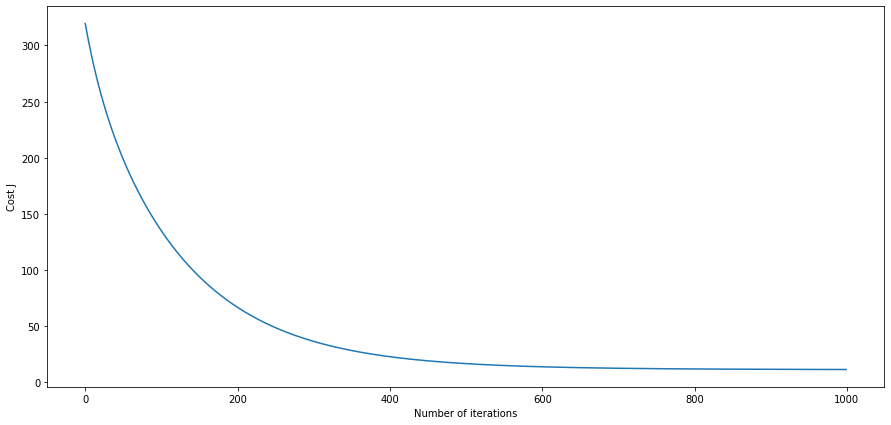

In [28]:
# Plot the convergence graph
plt.figure(figsize=(15,7))
#########################################
#             Question 10               #
#########################################
plt.plot(manual_Regression_model['manual_regressor'].cost_history)
#########################################
#########################################
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')


### <font color=blue>Interpretation:</font> 
- La fonction cout est trés élevée dans les premiéres itérations puis décroit  jusqu'a converger vers une valeur de 309.76, ceci montre que le minimum local a été atteint et que les paramétres ne seront plus mis a jour au déla de cette valeur. 